In [302]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD 

In [303]:
# convert JSON data to pandas df
df = pd.read_json('crime-data.json')

df

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,-0.4,5.5,-0.9,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1100,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,-2.2,16.1,-3.7,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1101,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,-20.3,-29.8,-19.4,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6
1102,Worcester County,2019,51606,0,12,24,94,186,1086,30,...,-8.2,4.2,-9.3,0.0,-0.6,-0.6,6.2,-14.0,-8.3,-12.3


In [304]:
# find total number of md counties
print(df['jurisdiction'].value_counts())
print(len(set(df['jurisdiction'].values)))

jurisdiction
Allegany County           46
Anne Arundel County       46
Wicomico County           46
Washington County         46
Talbot County             46
St. Mary's County         46
Somerset County           46
Queen Anne's County       46
Prince George's County    46
Montgomery County         46
Kent County               46
Howard County             46
Harford County            46
Garrett County            46
Frederick County          46
Dorchester County         46
Charles County            46
Cecil County              46
Carroll County            46
Caroline County           46
Calvert County            46
Baltimore County          46
Baltimore City            46
Worcester County          46
Name: count, dtype: int64
24


In [305]:
# cleaning data
df = df.fillna(0)
df = df.set_index(['jurisdiction', 'year'])

df

population  murder  rape  robbery  agg_assault  b_e  \
jurisdiction     year                                                        
Allegany County  1975       79655       3     5       20          114  669   
                 1976       83923       2     2       24           59  581   
                 1977       82102       3     7       32           85  592   
                 1978       79966       1     2       18           81  539   
                 1979       79721       1     7       18           84  502   
...                           ...     ...   ...      ...          ...  ...   
Worcester County 2016       51255       3    17       39           93  289   
                 2017       51408       2    26       43          106  220   
                 2018       51304       0    12       24           88  215   
                 2019       51606       0    12       24           94  186   
                 2020       52191       1    31       39          163  189   

                       larceny_theft  m_v_theft  grand_total  \
jurisdiction     year                                          
Allegany County  1975           1425         93         2329   
                 1976           1384         73         2125   
                 1977           1390        102         2211   
                 1978           1390        100         2131   
                 1979           1611         99         2322   
...                              ...        ...          ...   
Worcester County 2016           1514         32         1987   
                 2017           1514         39         1950   
                 2018           1178         34         1551   
                 2019           1086         30         1432   
                 2020           1085         28         1536   

                       violent_crime_total  ...  \
jurisdiction     year                       ...   
Allegany County  1975                  142  ...   
                 1976                   87  ...   
                 1977                  127  ...   
                 1978                  102  ...   
                 1979                  110  ...   
...                                    ...  ...   
Worcester County 2016                  152  ...   
                 2017                  177  ...   
                 2018                  124  ...   
                 2019                  130  ...   
                 2020                  234  ...   

                       overall_percent_change_per_100_000_people  \
jurisdiction     year                                              
Allegany County  1975                                        0.0   
                 1976                                      -13.4   
                 1977                                        6.4   
                 1978                                       -1.0   
                 1979                                        9.3   
...                                                          ...   
Worcester County 2016                                       -0.4   
                 2017                                       -2.2   
                 2018                                      -20.3   
                 2019                                       -8.2   
                 2020                                        6.1   

                       violent_crime_rate_percent_change_per_100_000_people  \
jurisdiction     year                                                         
Allegany County  1975                                                0.0      
                 1976                                              -41.8      
                 1977                                               49.2      
                 1978                                              -17.5      
                 1979                                                8.2      
...                                                                  ... 

In [306]:
# normalize number of crimes commited for each county, for every year
df_crimes = df[['murder', 'rape', 'robbery', 'agg_assault', 'b_e', 'larceny_theft', 'm_v_theft']]
df_crimes_normed = df_crimes.divide(df_crimes.sum(axis=1), axis=0)

df_crimes_normed

murder      rape   robbery  agg_assault       b_e  \
jurisdiction     year                                                        
Allegany County  1975  0.001288  0.002147  0.008587     0.048948  0.287248   
                 1976  0.000941  0.000941  0.011294     0.027765  0.273412   
                 1977  0.001357  0.003166  0.014473     0.038444  0.267752   
                 1978  0.000469  0.000939  0.008447     0.038010  0.252933   
                 1979  0.000431  0.003015  0.007752     0.036176  0.216193   
...                         ...       ...       ...          ...       ...   
Worcester County 2016  0.001510  0.008556  0.019628     0.046804  0.145445   
                 2017  0.001026  0.013333  0.022051     0.054359  0.112821   
                 2018  0.000000  0.007737  0.015474     0.056738  0.138620   
                 2019  0.000000  0.008380  0.016760     0.065642  0.129888   
                 2020  0.000651  0.020182  0.025391     0.106120  0.123047   

                       larceny_theft  m_v_theft  
jurisdiction     year                            
Allegany County  1975       0.611851   0.039931  
                 1976       0.651294   0.034353  
                 1977       0.628675   0.046133  
                 1978       0.652276   0.046926  
                 1979       0.693798   0.042636  
...                              ...        ...  
Worcester County 2016       0.761953   0.016105  
                 2017       0.776410   0.020000  
                 2018       0.759510   0.021921  
                 2019       0.758380   0.020950  
                 2020       0.706380   0.018229  

[1104 rows x 7 columns]

In [307]:
df_crimes_2022 = df_crimes_normed.loc(axis=0)[:, [2020]]
df_crimes_2022

,,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft
jurisdiction,year,,,,,,,
Allegany County,2020,0.000654,0.012426,0.027469,0.110530,0.204709,0.605625,0.038587
Anne Arundel County,2020,0.002492,0.014186,0.034218,0.123263,0.100930,0.664909,0.060002
Baltimore City,2020,0.011866,0.011511,0.122251,0.191175,0.146232,0.405834,0.111131
Baltimore County,2020,0.001646,0.017361,0.043801,0.128012,0.162534,0.579097,0.067548
Calvert County,2020,0.001155,0.017321,0.015012,0.128176,0.114319,0.662818,0.061201
Caroline County,2020,0.000000,0.015251,0.015251,0.106754,0.141612,0.681917,0.039216
Carroll County,2020,0.003642,0.026220,0.013838,0.092498,0.119446,0.709395,0.034960
Cecil County,2020,0.000493,0.008880,0.018254,0.106561,0.124815,0.679329,0.061667
Charles County,2020,0.005995,0.017610,0.035969,0.142750,0.096291,0.625328,0.076058


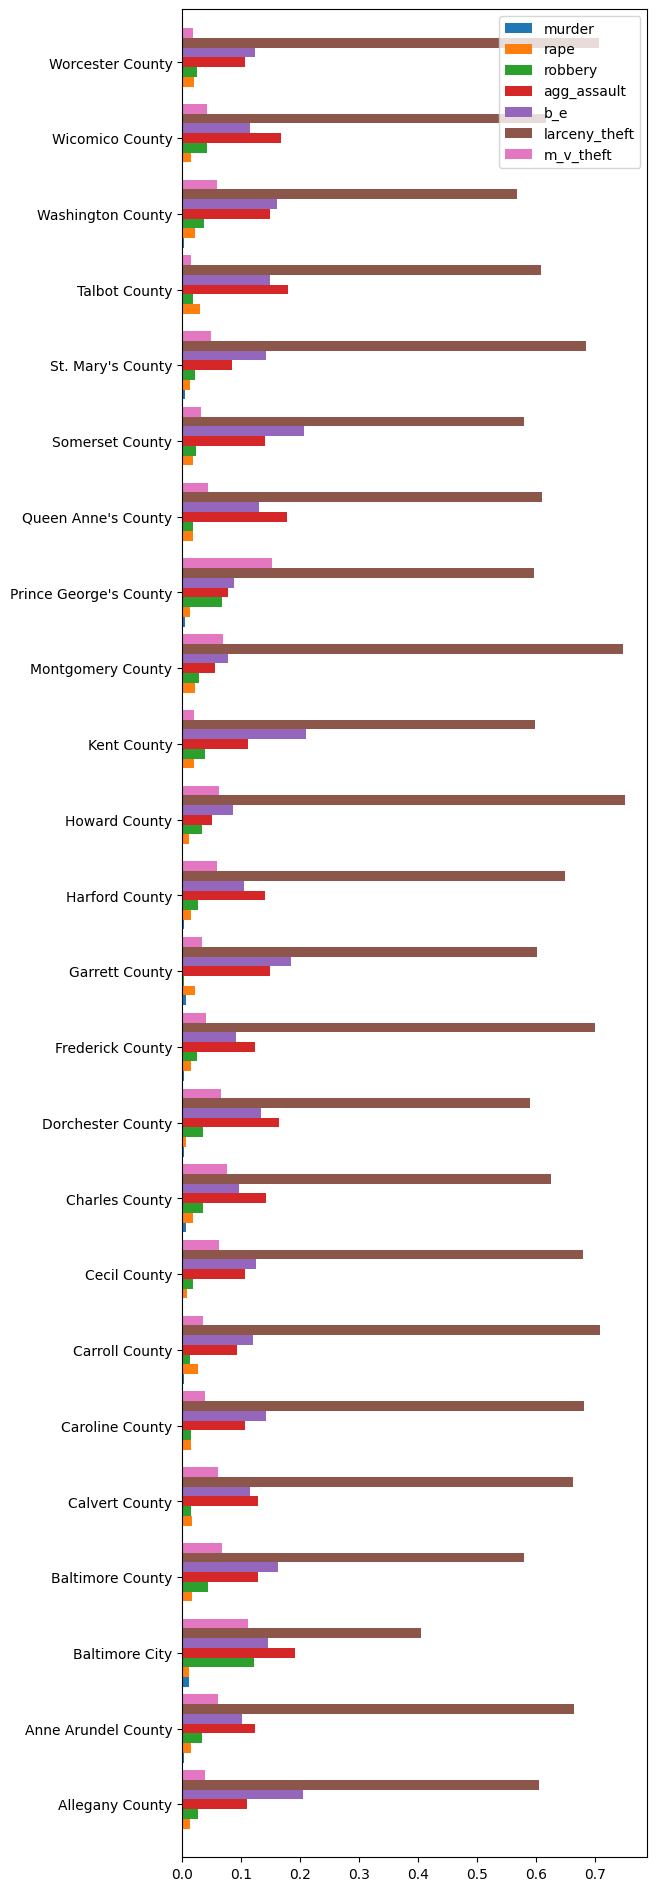

In [308]:
index = []
murder_rate = []
rape_rate = []
robbery_rate = []
agg_assault_rate = []
b_e_rate = []
larceny_theft_rate = []
m_v_theft_rate = []

for county, row in df_crimes_2022.iterrows():
    index.append(county[0])
    murder_rate.append(row['murder'])
    rape_rate.append(row['rape'])
    robbery_rate.append(row['robbery'])
    agg_assault_rate.append(row['agg_assault'])
    b_e_rate.append(row['b_e'])
    larceny_theft_rate.append(row['larceny_theft'])
    m_v_theft_rate.append(row['m_v_theft'])

df1 = pd.DataFrame({'murder': murder_rate,
                   'rape': rape_rate,
                   'robbery': robbery_rate,
                   'agg_assault': agg_assault_rate,
                   'b_e': b_e_rate,
                   'larceny_theft': larceny_theft_rate,
                   'm_v_theft': m_v_theft_rate}, index=index)

ax = df1.plot.barh(figsize=(6, 24), width=0.9)

## Use Jaccard Similarity by Crime Percent Change to Predict Population

In [309]:
# create df with chosen crime statistics
df_population_rates = df.iloc[:, 8:]
df_population_rates['population'] = df['population']

df_population_rates

grand_total  violent_crime_total  \
jurisdiction     year                                     
Allegany County  1975         2329                  142   
                 1976         2125                   87   
                 1977         2211                  127   
                 1978         2131                  102   
                 1979         2322                  110   
...                            ...                  ...   
Worcester County 2016         1987                  152   
                 2017         1950                  177   
                 2018         1551                  124   
                 2019         1432                  130   
                 2020         1536                  234   

                       violent_crime_percent  property_crime_totals  \
jurisdiction     year                                                 
Allegany County  1975                    6.1                   2187   
                 1976                    4.1                   2038   
                 1977                    5.7                   2084   
                 1978                    4.8                   2029   
                 1979                    4.7                   2212   
...                                      ...                    ...   
Worcester County 2016                    7.6                   1835   
                 2017                    9.1                   1773   
                 2018                    8.0                   1427   
                 2019                    9.1                   1302   
                 2020                   15.2                   1302   

                       property_crime_percent  \
jurisdiction     year                           
Allegany County  1975                    93.9   
                 1976                    95.9   
                 1977                    94.3   
                 1978                    95.2   
                 1979                    95.3   
...                                       ...   
Worcester County 2016                    92.4   
                 2017                    90.9   
                 2018                    92.0   
                 2019                    90.9   
                 2020                    84.8   

                       overall_crime_rate_per_100_000_people  \
jurisdiction     year                                          
Allegany County  1975                                 2923.9   
                 1976                                 2532.1   
                 1977                                 2693.0   
                 1978                                 2664.9   
                 1979                                 2912.7   
...                                                      ...   
Worcester County 2016                                 3876.7   
                 2017                                 3793.2   
                 2018                                 3023.2   
                 2019                                 2774.9   
                 2020                                 2943.0   

                       violent_crime_rate_per_100_000_people  \
jurisdiction     year                                          
Allegany County  1975                                  178.3   
                 1976                                  103.7   
                 1977                                  154.7   
                 1978                                  127.6   
                 1979                                  138.0   
...                                                      ...   
Worcester County 2016                                  296.6   
                 2017                                  344.3   
                 2018                                  241.7   
                 2019                                  251.9   
                 2020                                  448.4   

                       prop

In [310]:
# split test/train data
all_ids = df.index.values
training_ids, testing_ids = train_test_split(all_ids, test_size=0.2)

training_ids.shape, testing_ids.shape

((883,), (221,))

In [311]:
k_nn = 10
prediction_rows = []

# find k most similar counties in the training set

for test_id in testing_ids:

    target_obj = set(df_population_rates.loc[test_id[0], test_id[1]].values)
    
    test_county_similarities = []

    for this_id in training_ids:
        this_obj = set(df_population_rates.loc[this_id[0], this_id[1]].values)

        this_intersect = this_obj.intersection(target_obj)
        this_union = this_obj.union(target_obj)

        jaccard = len(this_intersect) / len(this_union)

        test_county_similarities.append({
            "county": this_id,
            "jaccard": jaccard,
        })

    similarity_df = pd.DataFrame(test_county_similarities, columns=["county", "jaccard"])
    top_counties = similarity_df.sort_values(by="jaccard", ascending=False).head(k_nn)

    relevant_populations = []
    for this_id in top_counties["county"]:
        
        # add relevant populations
        relevant_populations.append(df['population'].loc[this_id[0], this_id[1]])
        
    # take average total population
    predicted_populations = np.mean(relevant_populations)

    # track predictions
    prediction_rows.append({
            "county": test_id,
            "population": predicted_populations,
        })
    
predicted_df = pd.DataFrame(prediction_rows).set_index("county")


In [312]:
correct_populations = []

# count number of accurate predictions
for county,row in predicted_df.iterrows():

    actual_population = df['population'].loc[county[0], county[1]]

    # mark correct if prediction is less/more than 40000 of the original total population
    correct_populations.append(1 if row['population'] >= actual_population-40000 and row['population'] <= actual_population+40000 else 0)
    
accuracy = sum(correct_populations) / len(correct_populations)
print("Accuracy:", accuracy)

Accuracy: 0.1583710407239819


In [313]:
def find_real_population(row):
    return df['population'].loc[row.name[0], row.name[1]]

# create df comparing predicted and real populations
model = predicted_df
model['real_population'] = predicted_df.apply(find_real_population, axis=1)

model

,population,real_population
county,,
"(Dorchester County, 1989)",179938.1,30875
"(Allegany County, 1988)",256363.8,76500
"(Charles County, 2011)",274411.7,147940
"(St. Mary's County, 1999)",212257.4,88299
"(Cecil County, 1992)",54403.4,73230
...,...,...
"(Carroll County, 1997)",102506.1,138835
"(Baltimore County, 1995)",339262.5,716904
"(Howard County, 1986)",430444.3,139251


## KMeans Clustering

In [314]:
# create combined features column with all percent change rates
def combined_features(row):
    return str(row['murder_rate_percent_change_per_100_000_people'])+" "+str(row['rape_rate_percent_change_per_100_000_people'])+", "+str(row['robbery_rate_percent_change_per_100_000_people'])+", "+str(row['agg_assault_rate_percent_change_per_100_000_people'])+", "+str(row['b_e_rate_percent_change_per_100_000_people'])+", "+str(row['larceny_theft_rate_percent_change_per_100_000_people'])+", "+str(row['m_v_theft_rate_percent_change_per_100_000_people'])

df['all_change_rates'] = df.apply(combined_features, axis=1)
# count number of features present in each title
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['all_change_rates'])
df_matrix = pd.DataFrame(count_matrix.toarray(), columns=cv.get_feature_names_out())
print(df_matrix)

# set similarity metric
cosine_sim = cosine_similarity(count_matrix)

      10  100  101  1010  102  1028  103  104  105  106  ...  917  92  93  94  \
0      0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1      0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
2      0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
3      0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
4      0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
...   ..  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ..  ..  ..   
1099   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1100   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1101   0    1    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1102   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1103   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   

      95  96  97  977  98  

In [315]:
k=9

# apply KMeans clustering
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df_matrix)

cluster_labels = cluster_model.predict(df_matrix)
county_cluster_df = pd.DataFrame(cluster_labels, index=df_matrix.index, columns=["cluster"])

county_cluster_df["cluster"].value_counts()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
2    332
1    141
6    118
4    115
7    111
3     90
5     73
0     63
8     61
Name: count, dtype: int64

In [316]:
df2 = df.reset_index()
for cluster,county in county_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", county.shape[0])
    
    # sample 5 items from each cluster
    for c_id in county.sample(5).index:
        print("\t", c_id, df2['jurisdiction'].iloc[c_id], df2['year'].iloc[c_id])

Cluster: 0 Size: 63
	 518 Garrett County 1987
	 626 Howard County 2003
	 199 Calvert County 1990
	 228 Calvert County 2019
	 610 Howard County 1987
Cluster: 1 Size: 141
	 95 Baltimore City 1978
	 701 Montgomery County 1986
	 1100 Worcester County 2017
	 815 Queen Anne's County 2008
	 26 Allegany County 2001
Cluster: 2 Size: 332
	 683 Kent County 2014
	 1005 Washington County 2014
	 686 Kent County 2017
	 961 Talbot County 2016
	 1014 Wicomico County 1977
Cluster: 3 Size: 90
	 671 Kent County 2002
	 939 Talbot County 1994
	 496 Frederick County 2011
	 142 Baltimore County 1979
	 144 Baltimore County 1981
Cluster: 4 Size: 115
	 264 Caroline County 2009
	 458 Dorchester County 2019
	 428 Dorchester County 1989
	 254 Caroline County 1999
	 463 Frederick County 1978
Cluster: 5 Size: 73
	 700 Montgomery County 1985
	 181 Baltimore County 2018
	 922 Talbot County 1977
	 137 Baltimore City 2020
	 902 St. Mary's County 2003
Cluster: 6 Size: 118
	 613 Howard County 1990
	 151 Baltimore County 19

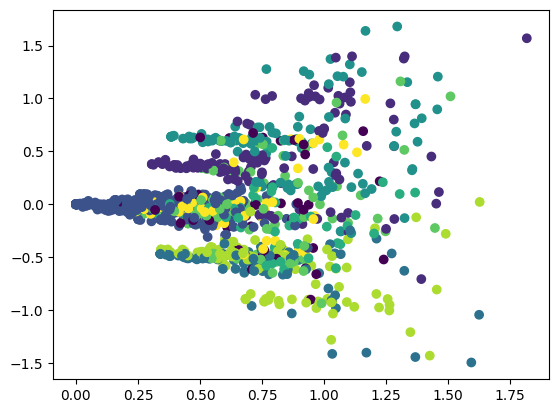

In [317]:
# reduce matrix and plot points
svd = TruncatedSVD(n_components=2)
svd.fit(df_matrix)
matrix_reduced = svd.transform(df_matrix)

plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1], c=cluster_labels)

## Find Similar Counties and Years

In [318]:
df1 = df.reset_index()
similarity_dict = {}

for index, row in df1.iterrows():
    # generate distances from target county to all other counties
    similar_counties = list(enumerate(cosine_sim[index]))
    
    # sort to get most similar counties first
    sorted_similar_counties = sorted(similar_counties, key = lambda x:x[1], reverse = True)

    similarity_dict[index] = sorted_similar_counties

In [319]:
# sample similarities for target county and year

# Baltimore City, 1982
target_similar_counties = similarity_dict[99]
print("\n-",df1['jurisdiction'].loc[99], df1['year'].loc[99])

# print top ten most similar counties
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break

# Montgomery County, 2005
target_similar_counties = similarity_dict[720]
print("\n-",df1['jurisdiction'].loc[720], df1['year'].loc[720])

# print top ten most similar counties
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break

# St. Mary's County, 2011
target_similar_counties = similarity_dict[910]
print("\n-",df1['jurisdiction'].loc[910], df1['year'].loc[910])

# print top ten most similar countiess
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break


- Baltimore City 1982
Baltimore City 1982 1.0000000000000002
Baltimore County 1999 0.8728715609439696
Baltimore County 1982 0.8660254037844388
Baltimore City 1977 0.816496580927726
Baltimore County 1996 0.816496580927726
Montgomery County 1990 0.816496580927726
Charles County 1996 0.7071067811865477
Anne Arundel County 1987 0.6666666666666669
Anne Arundel County 2001 0.6666666666666669
Anne Arundel County 2019 0.6666666666666669
Baltimore City 1980 0.6666666666666669

- Montgomery County 2005
Montgomery County 2005 1.0000000000000002
Montgomery County 1990 0.816496580927726
Anne Arundel County 2019 0.6666666666666669
Baltimore City 1982 0.6666666666666669
Baltimore County 2018 0.6666666666666669
Prince George's County 2013 0.6666666666666669
Wicomico County 1987 0.6666666666666669
St. Mary's County 1982 0.6546536707079772
Harford County 2011 0.6405126152203486
Baltimore City 1993 0.5773502691896258
Baltimore City 1998 0.5773502691896258

- St. Mary's County 2011
St. Mary's County 2011

## Elbow Method

In [320]:
# Let us test different values of k
interia_scores = []
for test_k in range(2, 32, 2):
    print(test_k)
    
    tmp_model = KMeans(n_clusters=test_k)
    tmp_model.fit(county_cluster_df)
    
    score = tmp_model.inertia_
    interia_scores.append((test_k, score))

2
4
6
8
10
12
14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

16
18
20
22
24
26
28
30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The de

In [321]:
intertia_df = pd.DataFrame(interia_scores, columns=["k", "score"])
intertia_df

,k,score
0,2,1.296686e+03
1,4,3.268006e+02
2,6,1.275647e+02
3,8,3.936628e+01
4,10,1.269314e-27
5,12,1.048898e-27
6,14,6.168492e-28
7,16,1.089059e-27
8,18,1.154732e-27
9,20,2.285367e-27


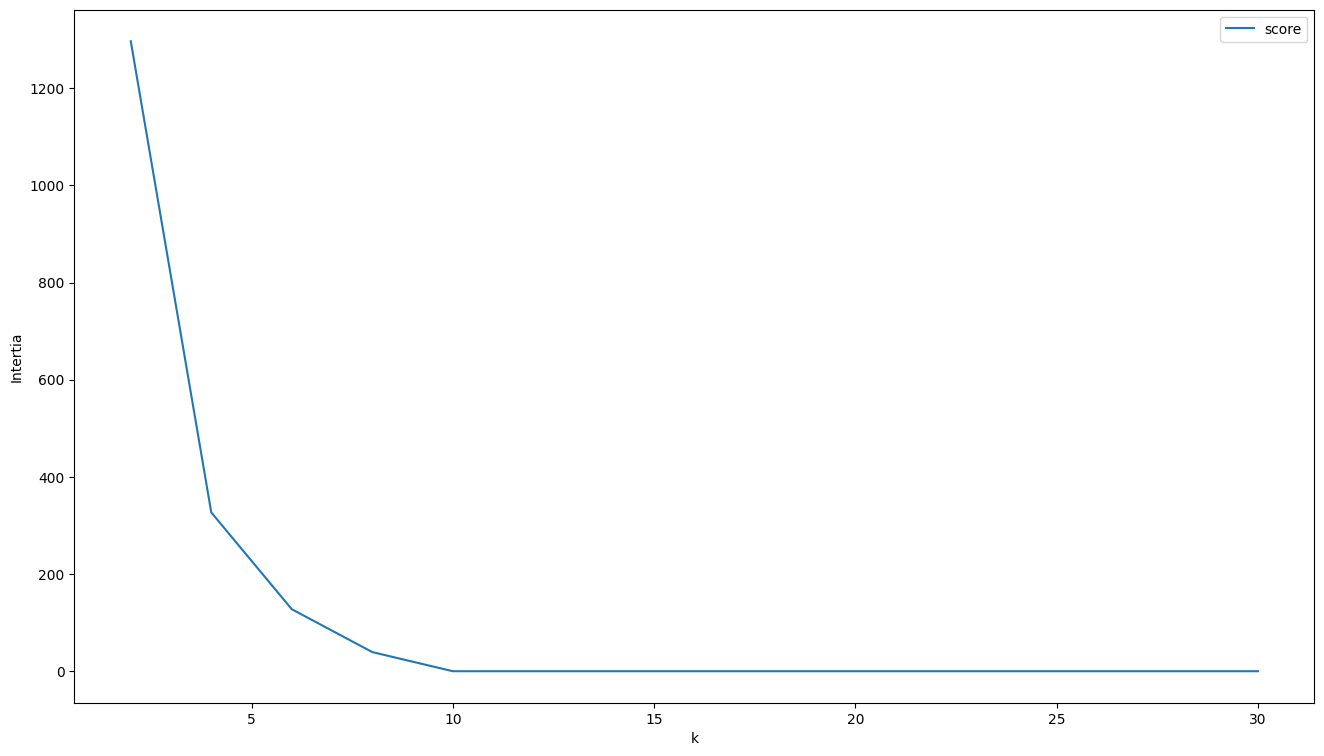

In [322]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

intertia_df.plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plt.show()